<a href="https://colab.research.google.com/github/jarodchristiansen/Machine-Learning-Deep-Learning/blob/master/Mushroom_Edibility_Classifier_Initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imageio

## Download Mushroom Dataset from external source
https://github.com/TuomoNieminen/deep-shrooms/blob/master/.ipynb_checkpoints/deep-shrooms-checkpoint.ipynb

https://www.mushroom.world/mushrooms/search/?searchText=gold

In [2]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

DATASET_VERSION = 'mushroom_world_2017_16_10'
DATASET_LINK = 'https://s3.eu-central-1.amazonaws.com/deep-shrooms/{}.zip'.format(DATASET_VERSION)

with urlopen(DATASET_LINK) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall('./data')


## Save images locally

In [3]:
!zip -r /content/Mushroom_data.zip /content/data

  adding: content/data/ (stored 0%)
  adding: content/data/mushroom_world_2017_16_10/ (stored 0%)
  adding: content/data/mushroom_world_2017_16_10/mushroom_classes.json (deflated 90%)
  adding: content/data/mushroom_world_2017_16_10/mushroom_imgs.json (deflated 93%)
  adding: content/data/mushroom_world_2017_16_10/mushroom_img/ (stored 0%)
  adding: content/data/mushroom_world_2017_16_10/mushroom_img/lactarius_camphoratus2.jpg (deflated 0%)
  adding: content/data/mushroom_world_2017_16_10/mushroom_img/hypholoma_fasciculare2.jpg (deflated 0%)
  adding: content/data/mushroom_world_2017_16_10/mushroom_img/coltricia_perennis3.jpg (deflated 0%)
  adding: content/data/mushroom_world_2017_16_10/mushroom_img/lactarius_camphoratus0.jpg (deflated 0%)
  adding: content/data/mushroom_world_2017_16_10/mushroom_img/russula_decolorans0.jpg (deflated 0%)
  adding: content/data/mushroom_world_2017_16_10/mushroom_img/hebeloma_crustuliniforme0.jpg (deflated 0%)
  adding: content/data/mushroom_world_2017_

In [4]:
from google.colab import files
files.download("/content/Mushroom_data.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Load Data

In [5]:
import pandas as pd
import numpy as np

DATASET_PATH = 'data/{}/'.format(DATASET_VERSION)

mushroom_classes = pd.read_json(DATASET_PATH + 'mushroom_classes.json', lines=True)
mushroom_imgs = pd.read_json(DATASET_PATH + 'mushroom_imgs.json', lines=True)
mushroom_info = mushroom_imgs.merge(mushroom_classes, how = "right", on = "name_latin")

# fin_names = pd.read_csv('test_labels.csv')

In [6]:
mushroom_classes

,name_latin,name_eng,url_mw,img_urls,edibility
0,Albatrellus ovinus,Sheep Polypore,http://www.mushroom.world/show?n=Albatrellus-o...,[http://www.mushroom.world/data/fungi/Albatrel...,edible
1,Tylopilus felleus,Bitter Bolete,http://www.mushroom.world/show?n=Tylopilus-fel...,[http://www.mushroom.world/data/fungi/Tylopilu...,inedible
2,Tricholomopsis rutilans,Plums and Custard,http://www.mushroom.world/show?n=Tricholomopsi...,[http://www.mushroom.world/data/fungi/Tricholo...,inedible
3,Tricholomopsis decora,Yellow Rider,http://www.mushroom.world/show?n=Tricholomopsi...,[http://www.mushroom.world/data/fungi/Tricholo...,inedible
4,Tricholoma sejunctum,False Edible Trich,http://www.mushroom.world/show?n=Tricholoma-se...,[http://www.mushroom.world/data/fungi/Tricholo...,inedible
...,...,...,...,...,...
117,Amanita fulva,Tawny grisette,http://www.mushroom.world/show?n=Amanita-fulva,[http://www.mushroom.world/data/fungi/Amanitaf...,inedible
118,Amanita ceciliae,on,http://www.mushroom.world/show?n=Amanita-ceciliae,[http://www.mushroom.world/data/fungi/Amanitac...,inedible
119,Albatrellus confluens,on,http://www.mushroom.world/show?n=Albatrellus-c...,[http://www.mushroom.world/data/fungi/Albatrel...,inedible
120,Agaricus augustus,The Prince,http://www.mushroom.world/show?n=Agaricus-augu...,[http://www.mushroom.world/data/fungi/Agaricus...,edible and good


In [7]:
mushroom_imgs

,name_latin,name_img,img_url,file_path
0,Tylopilus felleus,tylopilus_felleus0.jpg,http://www.mushroom.world/data/fungi/Tylopilus...,mushroom_img/tylopilus_felleus0.jpg
1,Tylopilus felleus,tylopilus_felleus1.jpg,http://www.mushroom.world/data/fungi/Tylopilus...,mushroom_img/tylopilus_felleus1.jpg
2,Albatrellus ovinus,albatrellus_ovinus0.jpg,http://www.mushroom.world/data/fungi/Albatrell...,mushroom_img/albatrellus_ovinus0.jpg
3,Albatrellus ovinus,albatrellus_ovinus1.jpg,http://www.mushroom.world/data/fungi/Albatrell...,mushroom_img/albatrellus_ovinus1.jpg
4,Albatrellus ovinus,albatrellus_ovinus2.jpg,http://www.mushroom.world/data/fungi/Albatrell...,mushroom_img/albatrellus_ovinus2.jpg
...,...,...,...,...
531,Agaricus arvensis,agaricus_arvensis0.jpg,http://www.mushroom.world/data/fungi/Agaricusa...,mushroom_img/agaricus_arvensis0.jpg
532,Agaricus arvensis,agaricus_arvensis1.jpg,http://www.mushroom.world/data/fungi/Agaricusa...,mushroom_img/agaricus_arvensis1.jpg
533,Agaricus arvensis,agaricus_arvensis2.jpg,http://www.mushroom.world/data/fungi/Agaricusa...,mushroom_img/agaricus_arvensis2.jpg
534,Agaricus arvensis,agaricus_arvensis3.jpg,http://www.mushroom.world/data/fungi/Agaricusa...,mushroom_img/agaricus_arvensis3.jpg


In [8]:
mushroom_info

,name_latin,name_img,img_url,file_path,name_eng,url_mw,img_urls,edibility
0,Albatrellus ovinus,albatrellus_ovinus0.jpg,http://www.mushroom.world/data/fungi/Albatrell...,mushroom_img/albatrellus_ovinus0.jpg,Sheep Polypore,http://www.mushroom.world/show?n=Albatrellus-o...,[http://www.mushroom.world/data/fungi/Albatrel...,edible
1,Albatrellus ovinus,albatrellus_ovinus1.jpg,http://www.mushroom.world/data/fungi/Albatrell...,mushroom_img/albatrellus_ovinus1.jpg,Sheep Polypore,http://www.mushroom.world/show?n=Albatrellus-o...,[http://www.mushroom.world/data/fungi/Albatrel...,edible
2,Albatrellus ovinus,albatrellus_ovinus2.jpg,http://www.mushroom.world/data/fungi/Albatrell...,mushroom_img/albatrellus_ovinus2.jpg,Sheep Polypore,http://www.mushroom.world/show?n=Albatrellus-o...,[http://www.mushroom.world/data/fungi/Albatrel...,edible
3,Albatrellus ovinus,albatrellus_ovinus3.jpg,http://www.mushroom.world/data/fungi/Albatrell...,mushroom_img/albatrellus_ovinus3.jpg,Sheep Polypore,http://www.mushroom.world/show?n=Albatrellus-o...,[http://www.mushroom.world/data/fungi/Albatrel...,edible
4,Albatrellus ovinus,albatrellus_ovinus4.jpg,http://www.mushroom.world/data/fungi/Albatrell...,mushroom_img/albatrellus_ovinus4.jpg,Sheep Polypore,http://www.mushroom.world/show?n=Albatrellus-o...,[http://www.mushroom.world/data/fungi/Albatrel...,edible
...,...,...,...,...,...,...,...,...
531,Agaricus arvensis,agaricus_arvensis0.jpg,http://www.mushroom.world/data/fungi/Agaricusa...,mushroom_img/agaricus_arvensis0.jpg,Horse Mushroom,http://www.mushroom.world/show?n=Agaricus-arve...,[http://www.mushroom.world/data/fungi/Agaricus...,edible and good
532,Agaricus arvensis,agaricus_arvensis1.jpg,http://www.mushroom.world/data/fungi/Agaricusa...,mushroom_img/agaricus_arvensis1.jpg,Horse Mushroom,http://www.mushroom.world/show?n=Agaricus-arve...,[http://www.mushroom.world/data/fungi/Agaricus...,edible and good
533,Agaricus arvensis,agaricus_arvensis2.jpg,http://www.mushroom.world/data/fungi/Agaricusa...,mushroom_img/agaricus_arvensis2.jpg,Horse Mushroom,http://www.mushroom.world/show?n=Agaricus-arve...,[http://www.mushroom.world/data/fungi/Agaricus...,edible and good
534,Agaricus arvensis,agaricus_arvensis3.jpg,http://www.mushroom.world/data/fungi/Agaricusa...,mushroom_img/agaricus_arvensis3.jpg,Horse Mushroom,http://www.mushroom.world/show?n=Agaricus-arve...,[http://www.mushroom.world/data/fungi/Agaricus...,edible and good


In [9]:
# from scipy import misc

# def load_mushroom_images(folder_path, img_df):
#     img_dict = {}
#     for index, path in enumerate(img_df['file_path']):
#         img_dict[index] = misc.imread(folder_path + path)
#     return img_dict

# img_dict = load_mushroom_images(DATASET_PATH, mushroom_info)

import imageio

def load_mushroom_images(folder_path, img_df):
    img_dict = {}
    for index, path in enumerate(img_df['file_path']):
        img_dict[index] = imageio.imread(folder_path + path)
    return img_dict

img_dict = load_mushroom_images(DATASET_PATH, mushroom_info)

<ipython-input-9-1466d40d6e91>:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_dict[index] = imageio.imread(folder_path + path)


In [10]:
#Quick look at the amount and shapes of images are not in the shape of the first element,
#which is in the most common format (360,480,3)
i = 0
for img in img_dict:
    if img_dict[img].shape != img_dict[0].shape:
        i = i + 1
        print(img_dict[img].shape)
        print(img)
print(i)

#If this cell is run after the formatting is done, it should print 0 since all pictures should be in same forma

(319, 480, 3)
10
(319, 480, 3)
11
(319, 480, 3)
12
(319, 480, 3)
13
(319, 480, 3)
14
(319, 480, 3)
17
(319, 480, 3)
18
(320, 480, 3)
55
(320, 480, 3)
56
(320, 480, 3)
57
(319, 480, 3)
58
(319, 480, 3)
59
(319, 480, 3)
60
(319, 480, 3)
105
(319, 480, 3)
106
(319, 480, 3)
107
(319, 480, 3)
108
(319, 480, 3)
112
(319, 480, 3)
113
(319, 480, 3)
114
(319, 480, 3)
115
(319, 480, 3)
116
(319, 480, 3)
120
(319, 480, 3)
121
(359, 480, 3)
148
(359, 480, 3)
155
(319, 480, 3)
159
(319, 480, 3)
160
(319, 480, 3)
161
(319, 480, 3)
162
(319, 480, 3)
172
(319, 480, 3)
173
(319, 480, 3)
174
(319, 480, 3)
175
(319, 480, 3)
176
(319, 480, 3)
177
(319, 480, 3)
178
(319, 480, 3)
179
(319, 480, 3)
180
(319, 480, 3)
189
(319, 480, 3)
190
(319, 480, 3)
191
(319, 480, 3)
192
(319, 480, 3)
193
(319, 480, 3)
194
(319, 480, 3)
195
(319, 480, 3)
196
(319, 480, 3)
197
(319, 480, 3)
198
(319, 480, 3)
199
(319, 480, 3)
211
(319, 480, 3)
215
(319, 480, 3)
231
(319, 480, 3)
232
(319, 480, 3)
233
(319, 480, 3)
234
(319,

In [11]:
import math
#Format the pictures to (480,480,3) by padding them with the edge values
for img in img_dict:
    height = 480 - img_dict[img].shape[0]
    width = 480 - img_dict[img].shape[1]

    if(height % 2 == 1 & width % 2 == 1):
        height1,height2 = math.floor(height/2), math.floor(height/2) + 1
        width1,width2 = math.floor(width/2), math.floor(width/2) +1
    elif(width % 2 == 1):
        width1,width2 = math.floor(width/2), math.floor(height/2) + 1
        height1,height2 = int(height/2), int(height/2)
    elif(height % 2 == 1):
        height1,height2 = math.floor(height/2), math.floor(height/2) + 1
        width1,width2 = int(width/2), int(width/2)
    else:
        height1,height2 = int(height/2), int(height/2)
        width1,width2 = int(width/2), int(width/2)

    if(height == 0):
        img_dict[img] = np.lib.pad(img_dict[img], ((0,0),(width1, width2),(0,0)), 'edge')
    elif (width == 0):
        img_dict[img] = np.lib.pad(img_dict[img], ((height1, height2),(0,0),(0,0)), 'edge')
    else:
        img_dict[img] = np.lib.pad(img_dict[img], ((height1, height2),(width1, width2),(0,0)), 'edge')

In [12]:
import matplotlib.pyplot as plt

def draw_im(i, image_data=img_dict, label_data=mushroom_info):
    name = label_data.iloc[i].name_latin
    edibility = label_data.iloc[i].edibility
    url = label_data.iloc[i].img_url
    x = image_data[i]
    plt.imshow(x)
    plt.title( name + ": " + edibility + "\n(" + url + ")")
    plt.show()

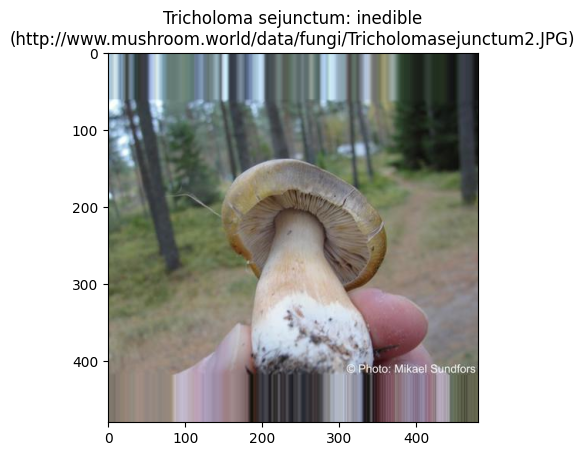

In [13]:
draw_im(20)

## Some Formatting


In [14]:
mushroom_info.edibility.value_counts()

,count
edibility,
inedible,202
edible,149
poisonous,77
edible and good,50
edible and excellent,27
lethally poisonous,16
edible when cooked,15


In [15]:
labels = mushroom_info.edibility.isin(("edible", "edible and good", "edible and excellent"))

X = []
y = []

for i in range(len(labels)):
    if(img_dict[i].shape == (480,480,3)):
        y.append(labels[i])
        X.append(img_dict[i])


X = np.stack(X)
y = pd.Series(y)

print(X.shape)
print(y.shape)

(536, 480, 480, 3)
(536,)


In [16]:
def draw_im2(i, X, y):
    plt.imshow(X[i])
    plt.title("edible: " + str(y[i]))
    plt.show()

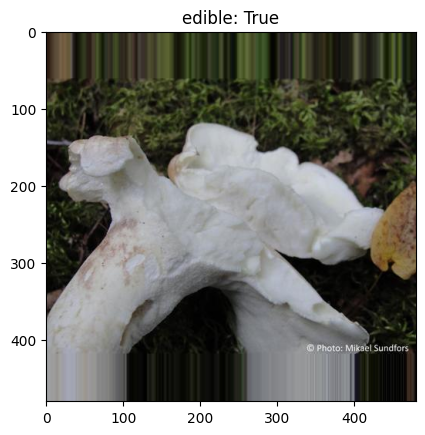

In [17]:
draw_im2(2, X, y)

It is usually a good idea to somwehat modify the predictors. An important step is to restrict the magnitude of the predictor values, since large values will cause numerical problems. With a small amount of images, other more advanced strategies are useful as well. Below I use imagedatagenerator from tensorflow which can provide augmentation of the images. This helps by creating slightly different versions of the training data samples by modifying the images before training.

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator()

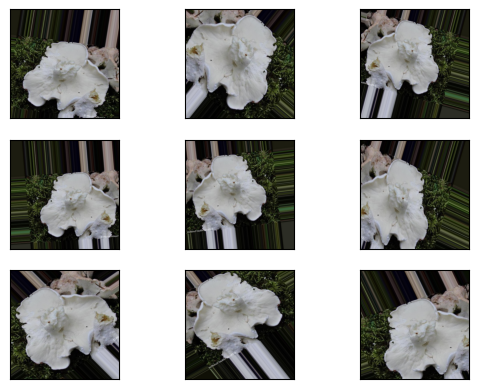

In [19]:
# See how the augmentation looks like
x = X[1]
x = x.reshape((1,) + x.shape)

f, ax = plt.subplots(3, 3)
ax[0,0].imshow(x[0])

i = 0
for batch in train_datagen.flow(x, batch_size=1):
    img = batch.astype(np.uint8)
    fig = ax[int(i/3), i%3].imshow(img[0])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    i += 1
    if i > 8:
        break  # otherwise the generator would loop indefinitely


plt.show()

Our labels are now a binary variable where "True" indicates that the mushroom is edible.

In [20]:
y.value_counts()

,count
False,310
True,226


In [21]:
# Train and test data

# rescale !!
X = X/255.0

N = len(X)
N_tr = int(0.8*N)

# shuffle the data
indx = np.arange(N)
np.random.shuffle(indx)
X = X[indx]
y = y[indx]

# split
X_tr = X[0:N_tr]
y_tr = y[0:N_tr]

X_te = X[N_tr:]
y_te = y[N_tr:]

## Modeling



### CNN from OG paper

Use Tensorflow to train neural networks. A tutorial for binary image classification is [here](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html).

---

**Further documentation on layers available:**

(ReLU) Rectified Linear Units - https://www.kaggle.com/code/dansbecker/rectified-linear-units-relu-in-deep-learning

---

Conv2D - https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

---

Sigmoid function - https://www.sciencedirect.com/topics/computer-science/sigmoid-function#:~:text=6.2.&text=Sigmoid%20functions%20are%20simply%20mathematical,line%20with%20standard%20probability%20situations.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

def my_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=X[0].shape)) # extracts features from images
    model.add(Activation('relu')) # Introduces non-linearity, improving the model through more complex patterns Rectified Linear Unit (ReLU) function
    model.add(MaxPooling2D(pool_size=(2, 2))) # Reduce the spatial dimensions of the feature maps (down-sampling).

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten()) # Convert the 2D feature maps into a 1D vector.
    model.add(Dense(64)) # Perform classification or regression based on the learned features.
    model.add(Activation('relu'))
    model.add(Dropout(0.4)) # Prevent overfitting.
    model.add(Dense(1))
    model.add(Activation('sigmoid')) # produces a probability
    return model

In [24]:
model = my_model()
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              # optimizer=Adam(),
              metrics=['accuracy'])

model_json = model.to_json()
with open("models/model.json", "w") as json_file:
    json_file.write(model_json)

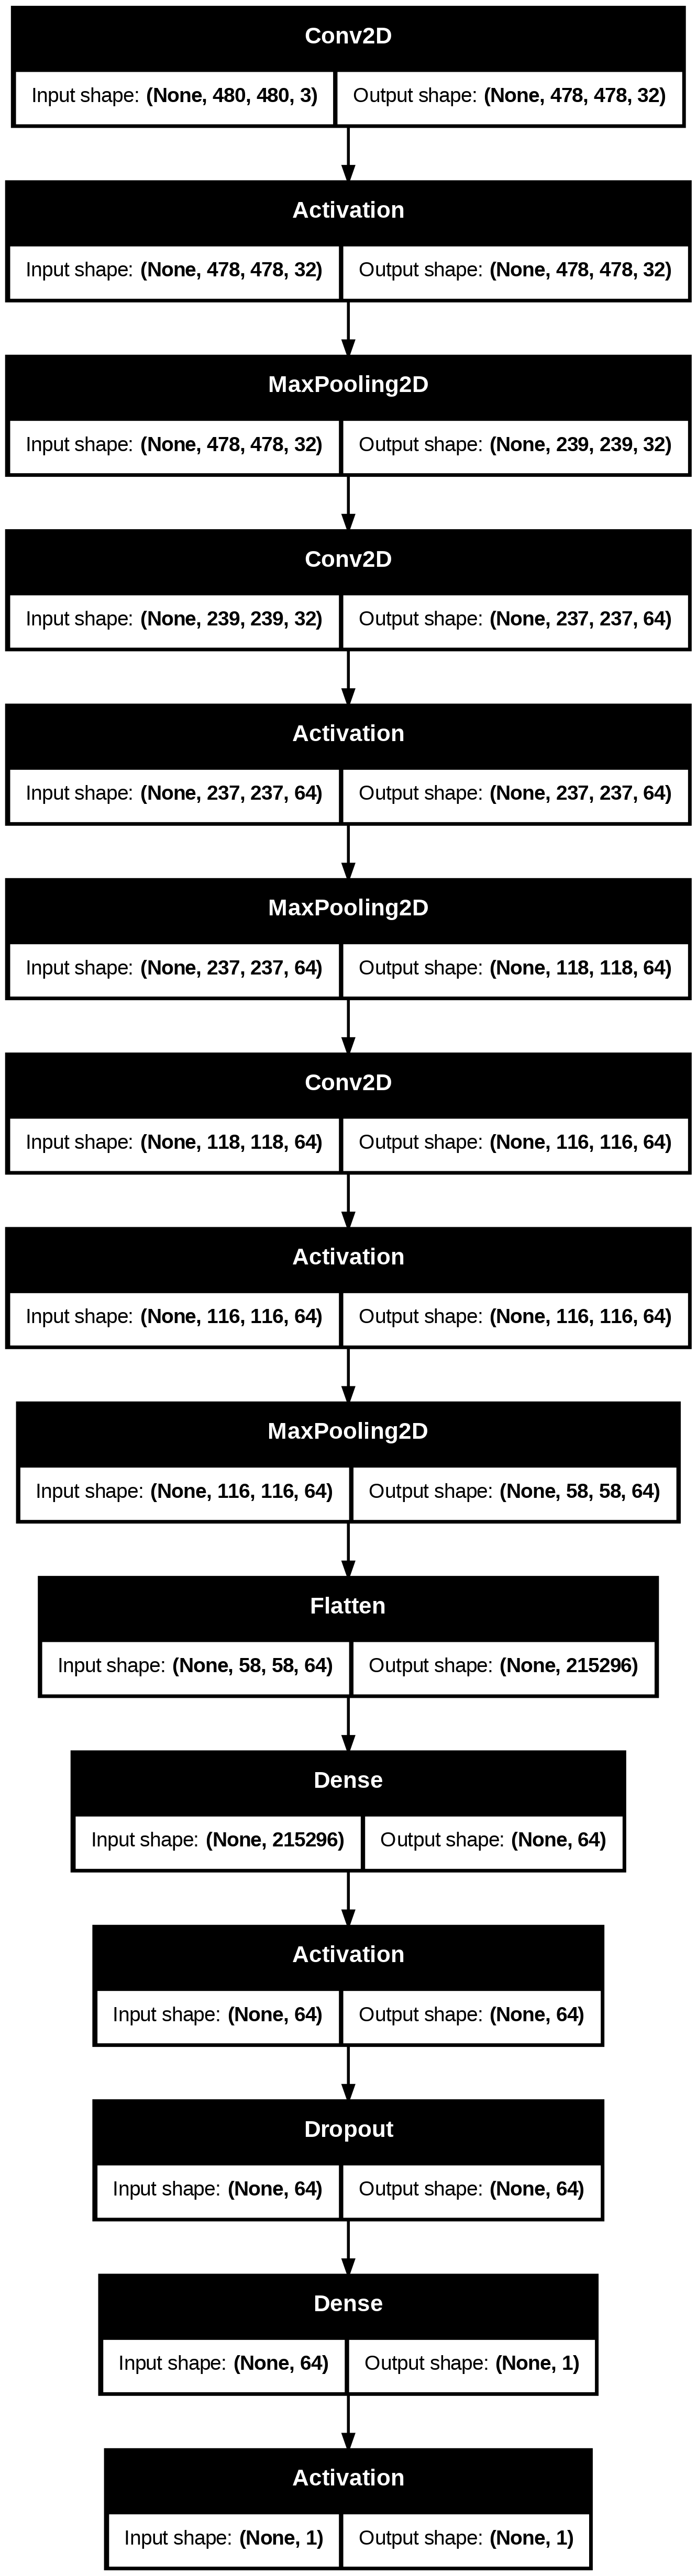

In [25]:
from keras.utils import plot_model
plot_model(model, show_shapes = True, to_file='docs/model.png')

In [26]:
history = model.fit(
    train_datagen.flow(X_tr, y_tr, batch_size=32),
    validation_data=test_datagen.flow(X_te, y_te, batch_size=32),
    steps_per_epoch=len(X_tr) // 32,
    validation_steps=len(X_te) // 32,
    epochs=100,
    verbose=1
)

# Save model weights and training history
model.save_weights('models/weights.h5')
import pickle
with open('models/history', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5098 - loss: 2.2813 - val_accuracy: 0.6146 - val_loss: 0.6902
Epoch 2/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.5625 - loss: 0.6903

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.5625 - loss: 0.6903 - val_accuracy: 0.6667 - val_loss: 0.6860
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.5156 - loss: 0.6934 - val_accuracy: 0.6146 - val_loss: 0.6666
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5625 - loss: 0.6634 - val_accuracy: 0.6667 - val_loss: 0.6385
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 995ms/step - accuracy: 0.5632 - loss: 0.6927 - val_accuracy: 0.6250 - val_loss: 0.6846
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6562 - loss: 0.6829 - val_accuracy: 0.5833 - val_loss: 0.6868
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5724 - loss: 0.6915 - val_accuracy: 0.6354 - val_loss: 0.6791
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6250 - loss: 0.6864 - val_accuracy: 0.5000 - val_loss: 0.7004
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 984ms/step - accuracy: 0.5615 - loss: 0.6983 - val_accuracy: 0.6146 - val_

ValueError: The filename must end in `.weights.h5`. Received: filepath=models/weights.h5

In [27]:
# Save model weights and training history
model.save_weights('models/mushrooms.weights.h5')
import pickle
with open('models/history', 'wb') as f:
    pickle.dump(history.history, f)

## Open Model & Predict

{'accuracy': [0.5227272510528564, 0.5625, 0.558080792427063, 0.5625, 0.5479797720909119, 0.65625, 0.558080792427063, 0.625, 0.5631313323974609, 0.625, 0.5707070827484131, 0.53125, 0.5649038553237915, 0.6666666865348816, 0.558080792427063, 0.6875, 0.560606062412262, 0.5, 0.5530303120613098, 0.75, 0.560606062412262, 0.65625, 0.5656565427780151, 0.59375, 0.560606062412262, 0.65625, 0.5681818127632141, 0.5625, 0.5707070827484131, 0.53125, 0.560606062412262, 0.65625, 0.5707070827484131, 0.53125, 0.5732323527336121, 0.5, 0.560606062412262, 0.65625, 0.5681818127632141, 0.5625, 0.5681818127632141, 0.5625, 0.5732323527336121, 0.5, 0.5732323527336121, 0.5, 0.5681818127632141, 0.5625, 0.560606062412262, 0.65625, 0.5757575631141663, 0.46875, 0.558080792427063, 0.6875, 0.5681818127632141, 0.5625, 0.5721153616905212, 0.4166666567325592, 0.5707070827484131, 0.53125, 0.5631313323974609, 0.625, 0.5707070827484131, 0.53125, 0.5732323527336121, 0.5, 0.5808081030845642, 0.40625, 0.567307710647583, 0.58333

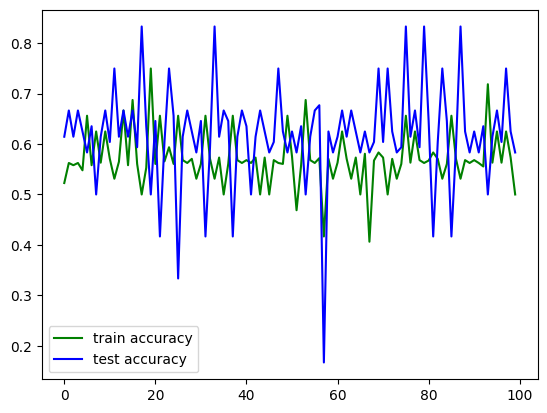

In [30]:
# load the model training history
with open("models/history", "rb") as f:
    hist = pickle.load(f)
    print(hist)

plt.plot(hist["accuracy"], label = "train accuracy", color = "green")
plt.plot(hist["val_accuracy"], label = "test accuracy", color = "blue")
plt.legend()
plt.savefig("docs/training_history.png")
plt.show()

In [31]:
!zip -r /content/Mushroom_ML_Model.zip /content/models
!zip -r /content/Mushroom_Documentation.zip /content/docs

files.download("/content/Mushroom_ML_Model.zip")
files.download("/content/Mushroom_Documentation.zip")

  adding: content/models/ (stored 0%)
  adding: content/models/mushrooms.weights.h5 (deflated 22%)
  adding: content/models/history (deflated 69%)
  adding: content/models/model.json (deflated 89%)
  adding: content/docs/ (stored 0%)
  adding: content/docs/training_history.png (deflated 5%)
  adding: content/docs/model.png (deflated 21%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
# load the saved json model
from keras.models import model_from_json

json_file = open('models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("models/mushrooms.weights.h5")

In [33]:
X_imgs = X*255.0

In [34]:
# inputs
# i: integer defining which image in X to do prediction on
# X: ndarray of shape (N, 480, 480 3) containing image data
# y: array of shape (N) containing edibility labels
# model: a model which has a .predict() method that outputs probabilities
# save: save the image to the docs/ folders
def predict_and_draw(i, X, y, model, save = False):
    x = X[i]
    x = x.astype(np.uint8)
    plt.imshow(x)
    x = x/ 255.0
    x.shape = (1, ) + x.shape
    p = model.predict(x)[0,0].round(2)
    plt.title("P(edible): " + str(p) + " Actually edible: " + str(y[i]))
    if(save):
        plt.savefig("docs/prediction_example.png")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


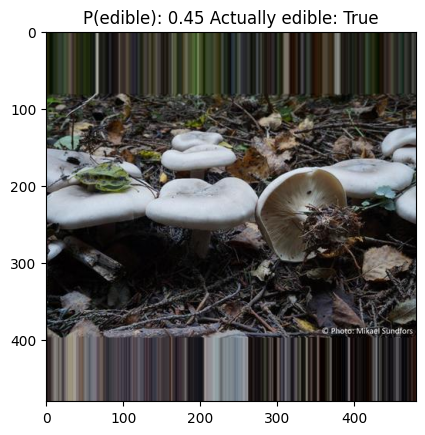

In [37]:
predict_and_draw(3, X = X_imgs, y = y, model = loaded_model, save = True)